In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [87]:
# Load Dataset
df = pd.read_csv('data/cleaned_salaries.csv')

####  Overall distribution of salaries across work years and experience levels

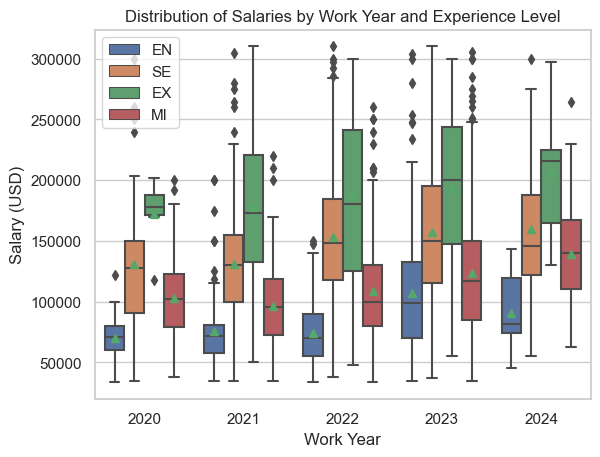

In [88]:
# Group the data by work_year and experience_level
grouped_data = df.groupby(["work_year", "experience_level"])["salary"]

# Create a boxplot using seaborn
sns.boxplot(
    x="work_year",
    y="salary",
    hue="experience_level",
    showmeans=True,
    data=df,
)

# Customize the plot
plt.xlabel("Work Year")
plt.ylabel("Salary (USD)")
plt.title("Distribution of Salaries by Work Year and Experience Level")
plt.legend()

# Show the plot
plt.show()

#### The average salary change for different employment types

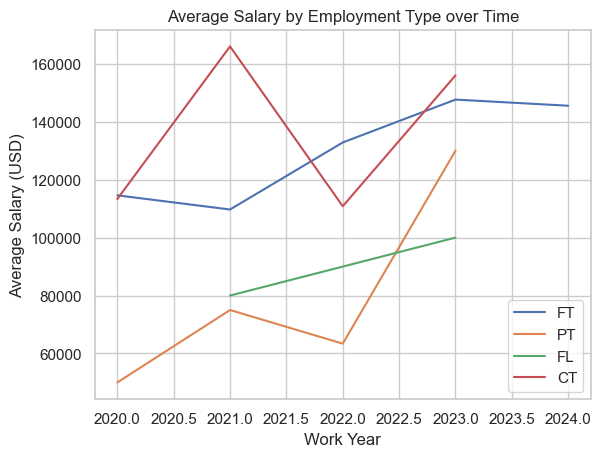

In [89]:
# Group by work_year and employment_type
grouped_data = df.groupby(["work_year", "employment_type"])["salary"]
# Calculate average salary by group
average_salary = grouped_data.mean()

# Reset multi-index for easier plotting
average_salary = average_salary.reset_index()
# Create Line Plot for each employment type
for employment_type in df["employment_type"].unique():
    filtered_data = average_salary[average_salary["employment_type"] == employment_type]
    plt.plot(filtered_data["work_year"], filtered_data["salary"], label=employment_type)

# Label and Display Plot
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Employment Type over Time")
plt.legend()
plt.show()

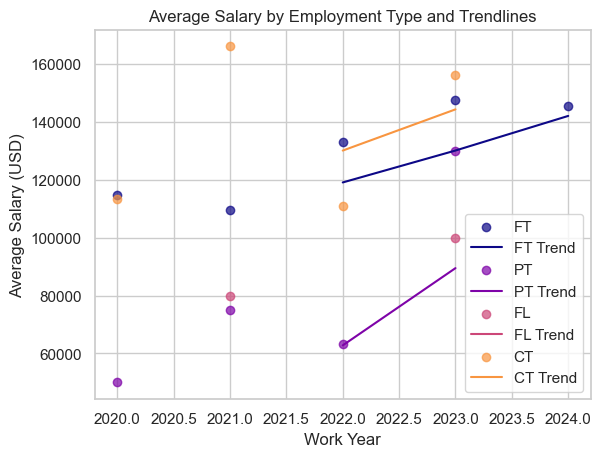

In [90]:
# Plot Scatter points with regression lines
for i, employment_type in enumerate(df["employment_type"].unique()):
    filtered_data = average_salary[average_salary["employment_type"] == employment_type]
    plt.scatter(
        filtered_data["work_year"],
        filtered_data["salary"],
        label=employment_type,
        color=plt.cm.plasma(i / len(df["employment_type"].unique())),
        alpha=0.7,
    )
    plt.plot(
        filtered_data["work_year"],
        filtered_data["salary"].rolling(window=3).mean(),
        color=plt.cm.plasma(i / len(df["employment_type"].unique())),
        label=f"{employment_type} Trend",
    )

# Label and Display Plot
plt.xlabel("Work Year")
plt.ylabel("Average Salary (USD)")
plt.title("Average Salary by Employment Type and Trendlines")
plt.legend()
plt.show()

#### Differences in salary based on job titles or company size

                                   count           mean           std  \
job_title                                                               
Application Security Analyst         6.0   85916.666667  85589.962418   
Application Security Architect       1.0  117000.000000           NaN   
Application Security Engineer       25.0  108480.000000  56800.909617   
Application Security Specialist      1.0   85000.000000           NaN   
Azure Security Engineer              3.0   58800.000000   2078.460969   
...                                  ...            ...           ...   
Vulnerability Analyst                9.0  124233.333333  43216.518833   
Vulnerability Management Analyst     2.0  100250.000000  45042.701962   
Vulnerability Management Engineer   14.0  147835.714286  48148.322235   
Vulnerability Researcher            10.0  119310.000000  56510.735460   
Zero Trust Architect                 4.0  151050.000000  68070.771995   

                                        min       

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1).

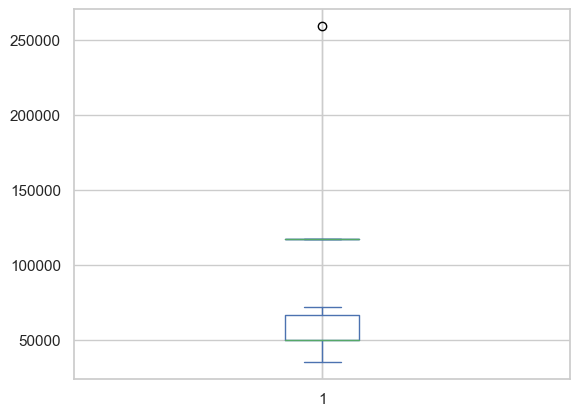

In [91]:
# Analyze salary differences by job title
grouped_by_job_title = df.groupby("job_title")["salary"]

# Calculate summary statistics
job_title_stats = grouped_by_job_title.describe()
print(job_title_stats)

# Visualize salary distributions (Option 1: Rotate labels)
job_title_boxplot = grouped_by_job_title.plot(kind="box")
ax = job_title_boxplot.axes  # Access Axes object
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate labels
plt.title("Salary Distribution by Job Title")
plt.show()

# Perform ANOVA test for statistical significance
f_statistic, p_value = stats.f_oneway(*grouped_by_job_title.apply(list))
print(f"ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

# Analyze salary differences by company size
grouped_by_company_size = df.groupby("company_size")["salary"]

# Calculate summary statistics
company_size_stats = grouped_by_company_size.describe()
print(company_size_stats)

# Visualize salary distributions (Option 2: Adjust tick positions)
company_size_boxplot = grouped_by_company_size.plot(kind="box")
ax = company_size_boxplot.axes  # Access Axes object
ax.set_xticks([0, 1])  # Set explicit tick positions
ax.set_xticklabels(ax.get_xticklabels())  # Apply labels
plt.title("Salary Distribution by Company Size")
plt.show()

# Perform ANOVA test for statistical significance
f_statistic, p_value = stats.f_oneway(*grouped_by_company_size.apply(list))
print(f"ANOVA F-statistic: {f_statistic:.2f}, p-value: {p_value:.4f}")

#### Salaries and employee residence or company location

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (1).

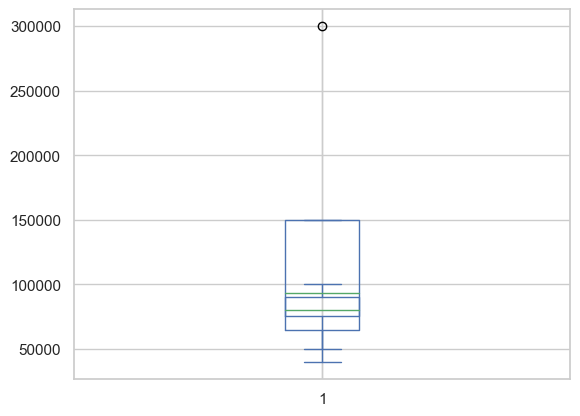

In [92]:
# Analyze salary variations by employee residence
grouped_by_residence = df.groupby("employee_residence")["salary"]

# Create a boxplot to visualize salary distribution
plt.figure()
residence_boxplot = grouped_by_residence.plot(kind="box")
plt.title("Salary Distribution by Employee Residence")
plt.xticks(range(len(grouped_by_residence)), grouped_by_residence.unique().index)
plt.show()

# Analyze salary variations by company location
grouped_by_company_location = df.groupby("company_location")["salary"]

# Create a violin plot for a different perspective
plt.figure()
company_location_violin = grouped_by_company_location.plot(kind="violin")
plt.title("Salary Distribution by Company Location")
plt.xticks(range(len(grouped_by_company_location)), grouped_by_company_location.unique().index)
plt.show()